# Project 3: Reddit 

## Part 1 - Data Wrangling

**Import libraries**

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [2]:
#https://stackoverflow.com/questions/59799041/why-reddit-return-502-error-when-accessing-a-page-using-beautifulsoup4
headers = {'user-agent':'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Mobile Safari/537.36'}
url = "https://api.pushshift.io/reddit/search/submission/" #Get the url
def read_data(params):
    response = requests.get(url, headers=headers,params=params)
    if response.status_code == 200:
        return response.json()['data'] 
    else:
        return []

In [3]:
def read_reddit_data(subreddit,num_records):
    before = None
    posts = []
    
    while(len(posts)<num_records):
        response = read_data({'subreddit': subreddit, 
                              'size':100, 
                              'sort':'desc',
                              'sort_type':'created_utc', 
                              'before':before, 
                              'fields':["id", "created_utc", "title", "selftext", "subreddit",
                                        "author_flair_text","link_flair_text"]})
        for post in response:
             if post.get('selftext', "").strip(" ") != "" :
                    posts.append(post)
        before = response[-1].get("created_utc")
 #https://stackoverflow.com/questions/20592808/add-all-elements-of-an-iterable-to-list
        time.sleep(1) # pauses for a second between each requests
    return posts

In [4]:
violin_subreddit = read_reddit_data("violinist",1000)

In [5]:
cello_subreddit = read_reddit_data("cello",1000)

In [6]:
len(violin_subreddit)

1003

In [7]:
len(cello_subreddit)

1033

In [8]:
# Turn list of dictionaries to a data frame!
violinist_df = pd.DataFrame(violin_subreddit)
violinist_df.head(10)

,author_flair_text,created_utc,id,selftext,subreddit,title,link_flair_text
0,None,1623783569,o0lttl,Due to some unfortunate circumstances (and ter...,violinist,Help!,NaN
1,None,1623776195,o0j053,1. How often do you rosin?\n2. Much much / how...,violinist,Rosin questions,NaN
2,None,1623775911,o0iwea,Hello! Is there any really good rosin I can us...,violinist,Which rosin,NaN
3,None,1623774812,o0ihfx,"This isn't really a violin question per se, bu...",violinist,I'm writing a strings passage but can't decide...,Original
4,None,1623723973,o03ff8,[removed],violinist,a Museletter Issue Twelve,NaN
5,Intermediate,1623718313,o01msj,[removed],violinist,Solo Canon: 4 little canons for Solo Violin,Original
6,None,1623707468,nzy0yn,I just knocked off my sound post and my bridge...,violinist,Sound Post,Setup/Equipment
7,None,1623705757,nzxej0,[deleted],violinist,We found a vintage Vienna violin in our grandf...,NaN
8,None,1623704899,nzx2xk,Hi! I played Paganini 5 without original bowin...,violinist,Need advice on Paganini 5 original bowing,NaN
9,None,1623702961,nzwc7r,Hello! I was just wondering how often should y...,violinist,Do I need new strings,NaN


In [9]:
# Turn list of dictionaries to a data frame!
cello_df = pd.DataFrame(cello_subreddit)
cello_df.head(10)

,author_flair_text,created_utc,id,selftext,subreddit,title
0,None,1623772571,o0hn28,Hey there people from r/Cello!\n\nI'm looking ...,Cello,I'm looking for a cello player for a Zelda Arr...
1,None,1623770561,o0gvzw,[removed],Cello,I can't relax... help
2,None,1623763528,o0eawx,"Hi everyone,\n\nBeen playing cello off and on ...",Cello,How do you all practice?
3,None,1623681716,nzocca,I'm a good month into learning the cello and n...,Cello,Struggle with stretching my fingers
4,None,1623663397,nzizuq,"Hi, this is so silly. But I used to study the ...",Cello,Need practicing pieces! (used to be a professi...
5,None,1623643536,nze65i,Does anyone know if these are good or do they ...,Cello,Harp Cello Tailpiece
6,None,1623591906,nywneg,"This may be a long shot, but if anyone might b...",Cello,Help with musician ID
7,None,1623590691,nyw9gs,"Hello all, I have a couple questions about the...",Cello,considering taking ABRSM exam
8,None,1623535450,nyhvfm,"Well, my quartet of adult learners had our fir...",Cello,First performance today... went mostly okay
9,None,1623526292,nyefm5,I am looking for nice lyrical pieces that make...,Cello,Suggestions for lyrical pieces (easy to interm...


In [10]:
cello_df['author_flair_text'].value_counts(normalize=True)

Student                0.862745
Bachelor of Music      0.058824
Name of your group     0.019608
cello prof.            0.019608
Arrangements/Comp      0.019608
High School Student    0.019608
Name: author_flair_text, dtype: float64

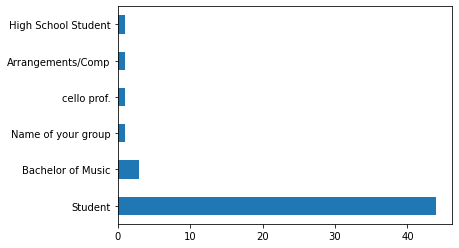

In [11]:
cello_df['author_flair_text'].value_counts().plot(kind='barh');

In [12]:
violinist_df['author_flair_text'].value_counts(normalize=True)

Adult Beginner      0.308901
Student             0.151832
Intermediate        0.120419
Teacher             0.089005
Amateur             0.083770
Beginner            0.083770
Expert              0.062827
Soloist             0.041885
Music Major         0.031414
Advanced            0.010471
Viola               0.010471
Gigging Musician    0.005236
Name: author_flair_text, dtype: float64

<AxesSubplot:>

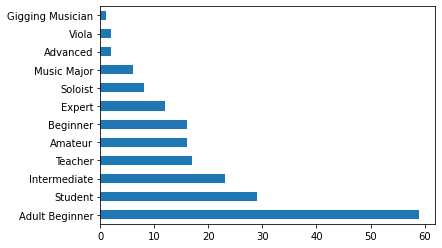

In [13]:
violinist_df['author_flair_text'].value_counts().plot(kind='barh')

In [14]:
violinist_df['link_flair_text'].value_counts(normalize=True)

Setup/Equipment               0.391144
Technique                     0.254613
Feedback                      0.188192
Original                      0.088561
Definitely Not About Cases    0.036900
Violin Jam                    0.018450
Share Your Playing            0.007380
Question                      0.003690
**IMPORTANT**                 0.003690
Composing                     0.003690
Help me Find Resources        0.003690
Name: link_flair_text, dtype: float64

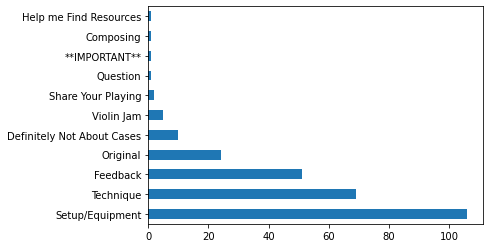

In [15]:
violinist_df['link_flair_text'].value_counts().plot(kind='barh');

In [16]:
cv = CountVectorizer()

In [17]:
cv.fit(cello_df['title'])
cello_cv = cv.transform(cello_df['title'])
cello_cv_df = pd.DataFrame(cello_cv.todense(),columns=cv.get_feature_names())
cello_cv_df.head()

,02,10,100,1000,11,110,122,14,1400,16th,...,zoom,аbоut,аnd,еxpеriеnсe,нis,оf,оnly,раssed,сallеd,тhеre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'key words')

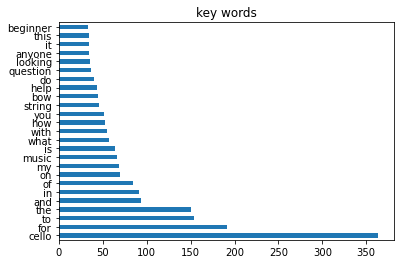

In [18]:
cello_cv_df.sum().sort_values(ascending=False).head(25).plot(kind='barh')
plt.title('key words')

In [19]:
cv.fit(violinist_df['title'])
violinist_cv = cv.transform(violinist_df['title'])
violinist_cv_df = pd.DataFrame(violinist_cv.todense(),columns=cv.get_feature_names())
violinist_cv_df.head()

,10,100,101,11,15,16ths,17,18,1852,18th,...,ysaye,ysaÿe,ysv104,zdzislaw,zigeunerweisen,zimmer,zoom,сriticism,バージョン,春のソナタ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'key words')

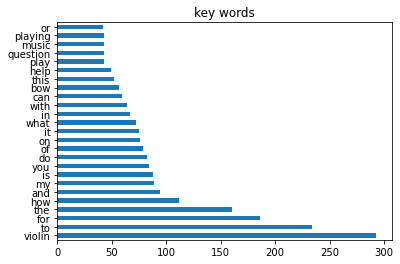

In [20]:
violinist_cv_df.sum().sort_values(ascending=False).head(25).plot(kind='barh')
plt.title('key words')

In [21]:
reddit_data = pd.concat([violinist_df,cello_df])

In [22]:
reddit_data.head(3)

,author_flair_text,created_utc,id,selftext,subreddit,title,link_flair_text
0,None,1623783569,o0lttl,Due to some unfortunate circumstances (and ter...,violinist,Help!,NaN
1,None,1623776195,o0j053,1. How often do you rosin?\n2. Much much / how...,violinist,Rosin questions,NaN
2,None,1623775911,o0iwea,Hello! Is there any really good rosin I can us...,violinist,Which rosin,NaN


In [23]:
reddit_data['author_flair_text'].value_counts(normalize=True)

Student                0.301653
Adult Beginner         0.243802
Intermediate           0.095041
Teacher                0.070248
Beginner               0.066116
Amateur                0.066116
Expert                 0.049587
Soloist                0.033058
Music Major            0.024793
Bachelor of Music      0.012397
Advanced               0.008264
Viola                  0.008264
Arrangements/Comp      0.004132
Name of your group     0.004132
cello prof.            0.004132
Gigging Musician       0.004132
High School Student    0.004132
Name: author_flair_text, dtype: float64

<AxesSubplot:>

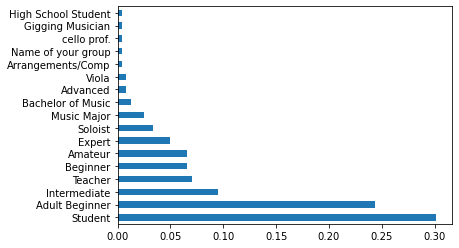

In [24]:
reddit_data['author_flair_text'].value_counts(normalize=True).plot(kind='barh')

In [25]:
cv.fit(reddit_data['title'])
reddit_data_cv = cv.transform(reddit_data['title'])
reddit_df = pd.DataFrame(reddit_data_cv.todense(),columns=cv.get_feature_names())
reddit_df.head()

,02,10,100,1000,101,11,110,122,14,1400,...,еxpеriеnсe,нis,оf,оnly,раssed,сallеd,сriticism,тhеre,バージョン,春のソナタ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

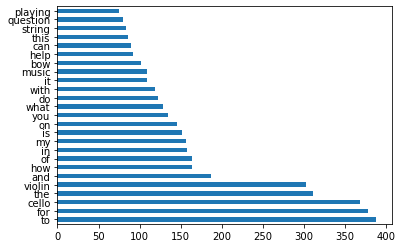

In [26]:
reddit_df.sum().sort_values(ascending=False).head(25).plot(kind='barh')

In [27]:
# Create Binary y column based on subreddit name
reddit_data['y'] = reddit_data['subreddit'].map(lambda x: 1 if x == 'violinist'else 0)

In [28]:
# Save data frame to csv
reddit_data.to_csv('../data/reddit_data.csv', index=False)

In [29]:
# read in collected subreddits
reddit_data = pd.read_csv('../data/reddit_data.csv')
reddit_data.head(3)

,author_flair_text,created_utc,id,selftext,subreddit,title,link_flair_text,y
0,NaN,1623783569,o0lttl,Due to some unfortunate circumstances (and ter...,violinist,Help!,NaN,1
1,NaN,1623776195,o0j053,1. How often do you rosin?\n2. Much much / how...,violinist,Rosin questions,NaN,1
2,NaN,1623775911,o0iwea,Hello! Is there any really good rosin I can us...,violinist,Which rosin,NaN,1


In [30]:
# check random row 'title'
reddit_data['title'][4]

'a Museletter Issue Twelve'

In [31]:
#check shape of the data
reddit_data.shape

(2036, 8)

In [32]:
#check for missing values
reddit_data.isnull().sum()

author_flair_text    1794
created_utc             0
id                      0
selftext                0
subreddit               0
title                   0
link_flair_text      1765
y                       0
dtype: int64

In [39]:
reddit_data['y'].value_counts(normalize=True)

1    0.789256
0    0.210744
Name: y, dtype: float64

In [43]:
features=['title','selftext']
X = reddit_data[features]
y = reddit_data['y']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 stratify=y) 

In [47]:
#cv,logreg
pipe = Pipeline([
    ('cv', CountVectorizer()),
    ('lr', LogisticRegressionCV(solver='liblinear'))
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [2, 181]